In [75]:
import control as ct
from tbcontrol.symbolic import routh
import sympy
import matplotlib.pyplot as plt
import numpy as np

# Etapas do LGR


Dados das questões

In [ ]:
polos = np.array([0,0,-9], dtype=np.complex64)
zeros = np.array([-1], dtype=np.complex64)

k,s = sympy.symbols('k s')
# Escrever Gs e Hs e achar o Ps
GsHs_numerador = (s + 1)
GsHs_denominador = s**2*(s + 9)

si = -2 + 1.j

# AS DUAS VARIAVEIS ABAIXO SERVEM PARA PLOTAR
# O GRAFICO NA ÚLTIMA CÉLULA
# 
# No menor indice do vetor, deve ser colocado
# a constante que acompanha o termo "s" de maior
# grau. TODOS OS TERMOS DEVEM ESTA COM O SINAL TROCADO
# Se o POLO/ZERO for do lado esquerdo do plano S, deve-se
# inverter seu sinal
# 
# EXEMPLO: (2s^2 + 4s + 7) / (s^2 + 99s)
# numerador = np.array([2,4,0,7]) 
# denominador = np.array([1,99,0])
Zeros_plot = np.array([1,1])
Polos_plot = np.array([1,9,0,0])

## 1. Escrever o Polinômio característico

$ 1 + G(s)H(s) = 0$ ou $1 + KP(s)$

<br>

sendo: $P(s) = G(s)H(s)$

In [77]:
display(GsHs_numerador)
display(GsHs_denominador)

s + 1

s**2*(s + 9)

## 2. Fatorar o polinômio

Fatorar o polinômio para ficar em função de Zeros ($n_z$) e Polos ($n_p$):

<br>

$1 + G(s)H(s) = 1 + K \cdot \frac{\prod_{i=1}^{n_z}(s + z_i)}{\prod_{j=1}^{n_p}(s + p_j)}$

In [78]:
Ps = GsHs_numerador / GsHs_denominador
Ps = sympy.factor(Ps)
display(Ps)

(s + 1)/(s**2*(s + 9))

## 3. Desenha no plano S os Zeros e Polos


* Polos = X
* Zeros = O

Np = 3
Nz = 1


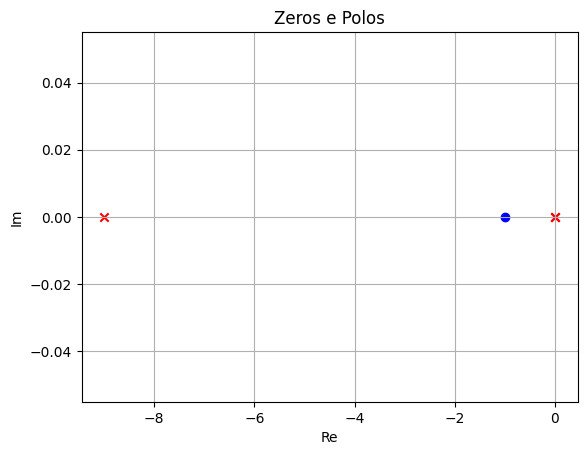

In [79]:
# Desenhar o gráfico com os polos e zeros
print(f'Np = {len(polos)}')
print(f'Nz = {len(zeros)}')

plt.scatter(polos.real, np.zeros(len(polos)), marker='x', color='r')
plt.scatter(zeros.real, np.zeros(len(zeros)), marker='o', color='b')
plt.grid()
plt.xlabel('Re')
plt.ylabel('Im')
plt.title('Zeros e Polos')

plt.show()

## 4. Desenhar no gráfico as LGR no eixo REAL

* A Direita do Polo/Zero, se tiver número ímpar de polos e zeros, logo aquele trecho é LGR;

* O LGR se situa a esquerda de um número ímpar de polos e zeros.

COLOCAR EXEMPLO


## 5. Determinar o número de lugares separados do LGR

Cada polo deve ir para um Zero, esses zeros podem ser os que estão na equação. Se sobrar Polos sem ligações com Zeros locais, esses polos terão curvas que vão para o Zero no INFINITO.

<br>

* $n_z$ = Número de pólos finitos;
* $n_p$ = Número de zeros finitos;

## 6. O LGR deve ser simétrico em relação ao EIXO REAL

## 7. Calcular os ângulos das assíntotas

* Ponto de encontro das assíntotas $\sigma_A:$

$\sigma_A = \frac{\sum(-p_j) - \sum(-z_i)}{n_p - n_z}$

* Ângulo de cada assíntota $\phi_A$:

$Φ_A = \frac{(2q +1)}{n_p - n_z}180°$

$q = 0,1,2,...,(n_p - n_z - 1)$

In [80]:
sigma_A = (np.sum(polos) - np.sum(zeros)) / (len(polos) - len(zeros))
print(f'Sigma_A = {sigma_A} (Ponto de encontro das assintotas)')

phi_A = np.zeros((len(polos)-len(zeros),))

for i in range((len(polos)-len(zeros))):
    phi_A[i] = (2*i+1) / ((len(polos)-len(zeros))) * 180

print(f'phi_a = {phi_A} (Angulos das assintotas)')

Sigma_A = (-4+0j) (Ponto de encontro das assintotas)
phi_a = [ 90. 270.] (Angulos das assintotas)


## 8. Determinar o ponto de saída ou chegada no eixo real

$\frac{dp(s)}{ds} = 0$

Sendo P(s):

$1 + K P(s) = 0$

$K P(s) = -1$

$K = -\frac{1}{P(s)}$, portanto, $p(s) = -\frac{1}{P(s)}$

$\frac{dp(s)}{ds} = \frac{denomiador de P(s)}{numerador de P(s)}$

In [81]:
ps = -1 / Ps
# ps = ps

dps = sympy.factor(sympy.diff(ps,s))
dps_numerador, dps_denominador = sympy.fraction(dps)

display(dps)

display(sympy.expand(dps_numerador))

display(sympy.roots(dps_numerador,s))

-2*s*(s + 3)**2/(s + 1)**2

-2*s**3 - 12*s**2 - 18*s

{-3: 2, 0: 1}

In [82]:
# Bhaskara simples
a = 2
b = 12
c = 18

delta = b**2 - 4 * a * c
print(f'Delta = {delta}')

if delta > 0:
    x1 = (-b + np.sqrt(delta)) / (2*4)
    x2 = (-b - np.sqrt(delta)) / (2*4)
    print(f'x1 = {x1}\nx2 ={x2}')
elif delta == 0:
    x12 = (-b) / (2*a)
    print(f'x1,2 = {x12}')
else:
    x1_complexo = (-b + np.sqrt(delta)) / (2*4)
    x2_complexo = (-b - np.sqrt(delta)) / (2*4)
    print(f'x1 = {x1_complexo}\nx2 ={x2_complexo}')


Delta = 0
x1,2 = -3.0


## 9. Determinar o ponto que cruza o eixo Imaginário

Caso desconfie que a LGR cruza o eixo imaginário, deve-se utilizar do Routh-Houwitz para detrminar o ponto de cruzamento a partir de um $K_{critico}$.

In [83]:
# fazer exemplo


## 10. Usando a condição de ângulo para saber o ângulo de saída dos polos complexos e de chegada para Zeros complexos

In [84]:
# Fazer exemplo

## 11. Critério de ângulo de fase

Serve para verificar se o ponto em questão, pertece ou não a LGR:

$/\underline{{G(s)H(s)}} |_{s = s_i} = \sum (\theta_i) - \sum (\phi_j) = 180° \pm q360° $

In [85]:
theta_sum = 0
phi_sum = 0

for i in polos:
    theta_sum += np.rad2deg(np.arctan2(si.imag - i.imag, si.real - i.real))
    # print(theta_sum)
# print()

for i in zeros:
    phi_sum += np.rad2deg(np.arctan2(si.imag - i.imag, si.real - i.real))
    # print(phi_sum)
# print()

print(f'ThetaSUM = {theta_sum}')
print(f'PhiSUM = {phi_sum}')

CriterioAngulo = theta_sum - phi_sum

if CriterioAngulo < (180 + 0.2) and CriterioAngulo > (180 - 0.2):
    print(f'DENTRO: Ponto pertence ao LGR: {CriterioAngulo} ') 
else:
    print(f'FORA: Ponto NAO pertence ao LGR: {CriterioAngulo}')

ThetaSUM = 315.0
PhiSUM = 135.0
DENTRO: Ponto pertence ao LGR: 180.0 


## 12. Critério de módulo

Serve para calcular o valor de K na raiz $s_i$:

$|k_iP(s)| = 1$

$K_i = \frac{\prod_{i=1}^{n_p} |(s + p_i)|}{\prod_{j=1}^{n_z} |(s + z_j)|} = 1$

onde $|s+p_i|$ e $|s+z_j|$ são os módulos das distânicias entre a raiz estudada e o polo/zero:

$K_i = \frac{\prod_{i=1}^{n_p}A_i}{\prod_{j=1}^{n_p}B_j} = 1$

In [86]:
Asum = 1
Bsum = 1

# Corrigir este cálculo
for i in polos:
    Asum *= np.sqrt((si.real-i.real)**2 + (si.imag - i.imag)**2)
    # print(Asum)
    
for i in zeros:
    Bsum *= np.sqrt((si.real-i.real)**2 + (si.imag - i.imag)**2)
    # print(Bsum)
    
K = Asum / Bsum

print(f'Valor do parametro K na raiz {si}: {K}')

Valor do parametro K na raiz (-2+1j): 25.000000000000004


## Gráfico da LGR

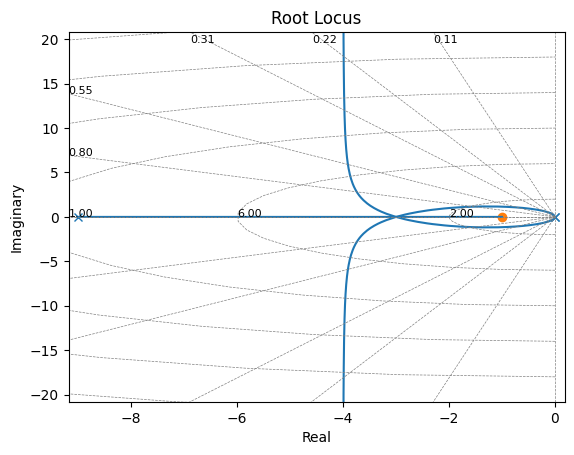

In [87]:
GH = ct.TransferFunction(Zeros_plot, Polos_plot)

rlist, klist = ct.rlocus(GH)

plt.show()